# ANZ Data Analysis Virtual Internship

##### About the dataset

The dataset contains 3 months worth transactions of 100 hypothetical cuatomers, it contains purchases, recuriing transactions and salary transactions. It is designed to simulate realistic transaction behaviors that are observed in AN's real transaction data. 

### Exploratory Data Analysis

Getting insights from data

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

### Reading in the dataset

In [2]:
#load dataset
ANZ_df = pd.read_excel('ANZ_dataset.xlsx')
ANZ_df.set_index('customer_id')
ANZ_df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
#number of rows
len(ANZ_df.index)

12043

In [4]:
#number of columns
len(ANZ_df.columns)

23

In [5]:
#checking columns
ANZ_df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [6]:
ANZ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [7]:
#descriptive statistics of the dataset
ANZ_df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [8]:
#sum of null values
ANZ_df.isna().sum().sort_values(ascending = False)

merchant_code        11160
bpay_biller_code     11158
card_present_flag     4326
merchant_state        4326
merchant_suburb       4326
merchant_id           4326
merchant_long_lat     4326
movement                 0
first_name               0
account                  0
currency                 0
long_lat                 0
txn_description          0
date                     0
balance                  0
gender                   0
age                      0
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
status                   0
dtype: int64

In [9]:
#knowing the data type of each column
ANZ_df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [10]:
#number of unique account
ANZ_df['account'].nunique()

100

In [11]:
#descriptive statistics
ANZ_df.groupby('account').describe()

card_present_flag                                           \
                           count      mean       std  min   25%  50%  75%   
account                                                                     
ACC-1037050564             220.0  0.827273  0.378873  0.0  1.00  1.0  1.0   
ACC-1056639002              58.0  0.775862  0.420655  0.0  1.00  1.0  1.0   
ACC-1199531521              43.0  0.744186  0.441481  0.0  0.50  1.0  1.0   
ACC-1217063613              14.0  0.785714  0.425815  0.0  1.00  1.0  1.0   
ACC-1222300524             276.0  0.818841  0.385850  0.0  1.00  1.0  1.0   
...                          ...       ...       ...  ...   ...  ...  ...   
ACC-854938045              115.0  0.808696  0.395049  0.0  1.00  1.0  1.0   
ACC-90814749                86.0  0.779070  0.417307  0.0  1.00  1.0  1.0   
ACC-958000567              112.0  0.750000  0.434959  0.0  0.75  1.0  1.0   
ACC-964839203               69.0  0.855072  0.354607  0.0  1.00  1.0  1.0   
ACC-966140392              112.0  0.803571  0.399082  0.0  1.00  1.0  1.0   

                    merchant_code       ...   age       amount              \
                max         count mean  ...   75%   max  count        mean   
account                                 ...                                  
ACC-1037050564  1.0          13.0  0.0  ...  40.0  40.0  259.0   74.465019   
ACC-1056639002  1.0           6.0  0.0  ...  22.0  22.0   86.0  265.134767   
ACC-1199531521  1.0           7.0  0.0  ...  52.0  52.0   77.0  418.742468   
ACC-1217063613  1.0           2.0  0.0  ...  27.0  27.0   25.0  426.108800   
ACC-1222300524  1.0          13.0  0.0  ...  38.0  38.0  303.0   78.206106   
...             ...           ...  ...  ...   ...   ...    ...         ...   
ACC-854938045   1.0           7.0  0.0  ...  28.0  28.0  169.0  156.932249   
ACC-90814749    1.0           6.0  0.0  ...  35.0  35.0  124.0  167.893548   
ACC-958000567   1.0           7.0  0.0  ...  34.0  34.0  174.0  210.277299   
ACC-964839203   1.0          13.0  0.0  ...  21.0  21.0  118.0  222.325932   
ACC-966140392   1.0           7.0  0.0  ...  21.0  21.0  152.0  154.711842   

                                                                      
                        std   min      25%     50%      75%      max  
account                                                               
ACC-1037050564   190.426861  3.71  14.1000  25.380  41.7150   892.09  
ACC-1056639002   808.951487  5.97  15.3200  35.170  54.8100  3195.01  
ACC-1199531521  1096.170654  6.31  20.0000  28.670  93.0000  3785.78  
ACC-1217063613  1336.447627  7.06  14.7300  20.000  41.7500  4863.62  
ACC-1222300524   245.088217  2.10   8.6900  15.970  26.7100  2349.55  
...                     ...   ...      ...     ...      ...      ...  
ACC-854938045    500.109586  5.62  25.2500  41.180  58.0000  2538.68  
ACC-90814749     513.971890  6.90  21.4850  36.000  57.2025  2308.67  
ACC-958000567    700.277440  5.96  17.7125  31.875  59.9200  3517.61  
ACC-964839203    505.626889  3.52  23.7725  31.545  52.6250  1956.00  
ACC-966140392    537.308981  5.92  12.8450  21.560  35.0000  2572.91  

[100 rows x 40 columns]

In [12]:
ANZ_df.reset_index(drop = True, inplace = True)

### Selecting relevant features

In [13]:
df_ANZ = ANZ_df[['customer_id','status','card_present_flag','balance','date','gender','age','merchant_suburb','merchant_state','amount','movement']]
df_ANZ.head()

,customer_id,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement
0,CUS-2487424745,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,debit
1,CUS-2487424745,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,debit
2,CUS-2142601169,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,debit
3,CUS-1614226872,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,debit
4,CUS-2487424745,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,debit


In [14]:
#knowing the number of null values in the taken relevant features
df_ANZ.isna().sum().sort_values(ascending = False)

merchant_state       4326
merchant_suburb      4326
card_present_flag    4326
movement                0
amount                  0
age                     0
gender                  0
date                    0
balance                 0
status                  0
customer_id             0
dtype: int64

In [15]:
#count of distinct status types
df_ANZ['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

Text(0.5, 1.0, 'Count of Status types')

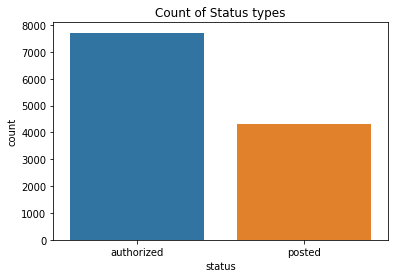

In [88]:
#count of status
sns.countplot(df_ANZ['status'])
plt.title('Count of Status types')

In [17]:
#number of each card present flag
df_ANZ['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [18]:
df_ANZ['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [19]:
df_ANZ['customer_id'].value_counts().tail()

CUS-3395687666    40
CUS-3201519139    37
CUS-1646183815    34
CUS-495599312     31
CUS-1739931018    25
Name: customer_id, dtype: int64

In [20]:
df_ANZ['customer_id'].value_counts().min()

25

In [21]:
#transforming date to month
def transform(date):
    if date.month == 8:
        return 'August'
    if date.month == 9:
        return 'September'
    if date.month == 10:
        return 'October'

In [22]:
#apply the transformation to the dataframe
df_ANZ['months'] = df_ANZ['date'].apply(transform)
df_ANZ.head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_id,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement,months
0,CUS-2487424745,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,debit,August
1,CUS-2487424745,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,debit,August
2,CUS-2142601169,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,debit,August
3,CUS-1614226872,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,debit,August
4,CUS-2487424745,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,debit,August


In [23]:
df_ANZ[10000:10020]

,customer_id,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement,months
10000,CUS-809013380,posted,NaN,8137.06,2018-10-16,F,21,NaN,NaN,1037.07,credit,October
10001,CUS-860700529,posted,NaN,4659.84,2018-10-16,M,30,NaN,NaN,165.00,debit,October
10002,CUS-1196156254,authorized,1.0,27866.77,2018-10-16,F,34,Lidcombe,NSW,33.89,debit,October
10003,CUS-860700529,authorized,1.0,4824.84,2018-10-16,M,30,Woolloongabba,QLD,141.15,debit,October
10004,CUS-1669695324,posted,NaN,7343.76,2018-10-16,F,25,NaN,NaN,32.00,debit,October
10005,CUS-2206365095,authorized,1.0,21075.33,2018-10-16,F,38,Brunswick East,VIC,23.21,debit,October
10006,CUS-2695611575,authorized,0.0,1745.27,2018-10-16,M,37,Aratula,QLD,18.20,debit,October
10007,CUS-2695611575,authorized,1.0,1724.74,2018-10-16,M,37,Southport,QLD,20.53,debit,October
10008,CUS-1005756958,posted,NaN,7835.09,2018-10-16,F,53,NaN,NaN,970.47,credit,October
10009,CUS-3151318058,posted,NaN,42287.02,2018-10-16,M,42,NaN,NaN,1757.82,credit,October


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5E47BEC88>,
      dtype=object)

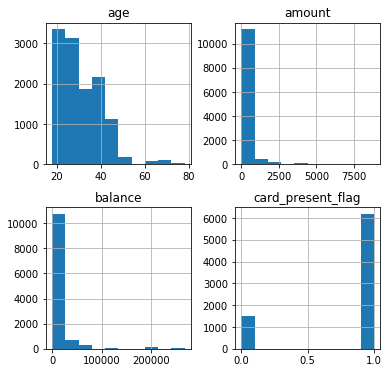

In [24]:
df_ANZ.hist(figsize = (6, 6))

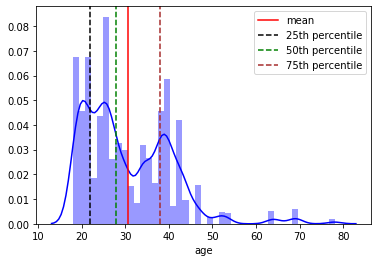

In [25]:
#dist plot of age
sns.distplot(df_ANZ['age'], color='blue')
plt.axvline(x = np.mean(df_ANZ['age']), c='red', label='mean')
plt.axvline(x = np.percentile(df_ANZ['age'], 25), c='black', ls='--', label='25th percentile')
plt.axvline(x = np.percentile(df_ANZ['age'], 50), c='g', ls='--', label = '50th percentile')
plt.axvline(x = np.percentile(df_ANZ['age'], 75), c='brown', ls='--', label='75th percentile')
plt.legend()

In [26]:
#grouping the dataset by month
df_ANZ.groupby('months').mean()

,card_present_flag,balance,age,amount
months,,,,
August,0.805128,10794.148620,30.482881,185.121867
October,0.803565,18450.991566,30.726205,196.427323
September,0.799308,14730.151136,30.533516,182.045903


In [27]:
df_ANZ['months'].value_counts()

October      4087
September    4013
August       3943
Name: months, dtype: int64

In [28]:
date_count = df_ANZ.groupby('date').count()
date_count

,customer_id,status,card_present_flag,balance,gender,age,merchant_suburb,merchant_state,amount,movement,months
date,,,,,,,,,,,
2018-08-01,137,137,84,137,137,137,84,84,137,137,137
2018-08-02,152,152,99,152,152,152,99,99,152,152,152
2018-08-03,157,157,99,157,157,157,99,99,157,157,157
2018-08-04,118,118,94,118,118,118,94,94,118,118,118
2018-08-05,100,100,73,100,100,100,73,73,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-27,139,139,101,139,139,139,101,101,139,139,139
2018-10-28,143,143,101,143,143,143,101,101,143,143,143
2018-10-29,102,102,63,102,102,102,63,63,102,102,102


In [29]:
tran_volume = date_count['customer_id'].mean()
tran_volume

132.34065934065933

In [30]:
length = len(date_count.index)
length

91

### Each days transaction volume made by customers

In [31]:
#plt.figure()
#plt.plot(date_count.index, date_count['customer_id'], c='red', label='Customer ID')
#plt.plot(date_count.index, np.linspace(tran_volume,tran_volume,length), color = 'black', label= 'mean transaction volume')
#plt.title('ANZ Transaction Volume')
#plt.ylabel('Number of Customers')
#plt.xlabel('Date')
#plt.legend()
#plt.tight_layout()
#plt.show()

Text(0.5, 1, 'ANZ Transaction Volume')

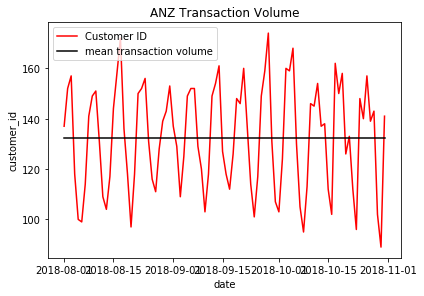

In [32]:
sns.lineplot(x = df_ANZ.groupby('date').mean().index, y=df_ANZ.groupby('date').count()['customer_id'], color='red', label='Customer ID')
#plt.axvline(x = np.mean(df_ANZ['age']), c='red', label='mean')
plt.plot(date_count.index, np.linspace(tran_volume,tran_volume,length), color = 'black', label= 'mean transaction volume')
plt.legend()
plt.tight_layout()
plt.title('ANZ Transaction Volume')

In [33]:
date_mean = df_ANZ.groupby('date').mean()
date_mean

,card_present_flag,balance,age,amount
date,,,,
2018-08-01,0.750000,9933.975328,30.233577,218.014161
2018-08-02,0.858586,13963.617895,31.493421,143.331053
2018-08-03,0.797980,10187.786688,31.751592,242.653376
2018-08-04,0.787234,8206.809407,31.033898,53.356356
2018-08-05,0.739726,13297.525400,29.910000,44.265000
...,...,...,...,...
2018-10-27,0.801980,17025.213741,31.194245,50.155252
2018-10-28,0.772277,15298.837483,30.258741,59.007762
2018-10-29,0.746032,20863.967843,29.460784,377.932745


In [34]:
tran_amount = date_mean['amount'].mean()
tran_amount

190.61056774083966

In [35]:
length = len(date_mean.index)
length

91

### Average Transaction amount of customers

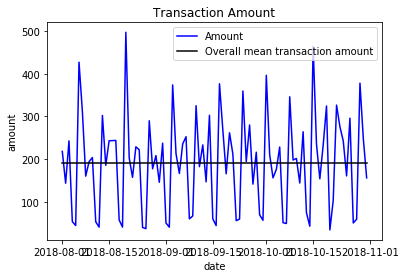

In [36]:
#plt.figure()
#plt.plot(date_mean.index, date_mean['amount'], c='blue', label='Amount')
#plt.plot(date_mean.index, np.linspace(tran_amount,tran_amount,length), color = 'black', label= 'Overall transaction amount')
#plt.title('ANZ Transaction Volume')
#plt.ylabel('Amount')
#plt.xlabel('Date')
#plt.legend()
#plt.tight_layout()
#plt.show()
sns.lineplot(x = df_ANZ.groupby('date').mean().index, y=df_ANZ.groupby('date').mean()['amount'], color='blue', label='Amount')
plt.plot(date_mean.index, np.linspace(tran_amount, tran_amount, length), color='black', label='Overall mean transaction amount')
plt.title('Transaction Amount')
plt.legend()

### Month of August Average Transaction Amount and Balance generated by Customers' age and gender

In [37]:
Aug_cust_by_id = df_ANZ[df_ANZ['months'] == 'August'].groupby('customer_id').mean()
Aug_cust_by_id

,card_present_flag,balance,age,amount
customer_id,,,,
CUS-1005756958,0.857143,903.382800,53,122.788000
CUS-1117979751,0.785714,6750.908372,21,202.402326
CUS-1140341822,0.700000,2275.090000,28,294.950667
CUS-1147642491,0.764706,3768.855862,34,305.363103
CUS-1196156254,0.814815,17873.442805,34,179.216220
...,...,...,...,...
CUS-72755508,0.933333,1964.083158,35,189.337895
CUS-809013380,0.836364,2733.607794,21,105.385441
CUS-860700529,0.750000,1463.578868,30,105.405094


In [38]:
Aug_cust_by_gender = df_ANZ[df_ANZ['months'] == 'August'].groupby('gender').mean()
Aug_cust_by_gender

,card_present_flag,balance,age,amount
gender,,,,
F,0.817684,7443.947172,30.428120,162.926567
M,0.792363,13906.689007,30.533757,205.742647


In [39]:
mean_female_aug_balance = Aug_cust_by_gender['balance'].iloc[0]
mean_female_aug_balance

7443.947172195884

In [40]:
mean_male_aug_balance = Aug_cust_by_gender['balance'].iloc[1]
mean_male_aug_balance

13906.689006849283

In [41]:
length = len(Aug_cust_by_id['age'])
length

100

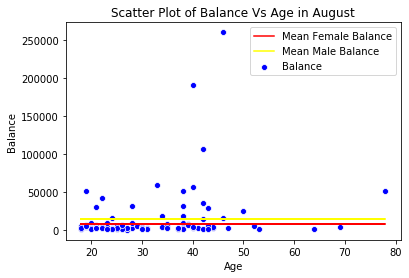

In [42]:
sns.scatterplot(x = Aug_cust_by_id['age'], y=Aug_cust_by_id['balance'], color='blue', label='Balance')
plt.plot(Aug_cust_by_id['age'], np.linspace(mean_female_aug_balance, mean_female_aug_balance, length), color = 'red', label='Mean Female Balance')
plt.plot(Aug_cust_by_id['age'], np.linspace(mean_male_aug_balance, mean_male_aug_balance, length), color = 'yellow', label='Mean Male Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot of Balance Vs Age in August')
plt.legend()

In [43]:
mean_female_aug_amount = Aug_cust_by_gender['amount'].iloc[0]
mean_female_aug_amount

162.92656661400727

In [44]:
mean_male_aug_amount = Aug_cust_by_gender['amount'].iloc[1]
mean_male_aug_amount

205.74264677103739

In [45]:
length = len(Aug_cust_by_id['age'])
length

100

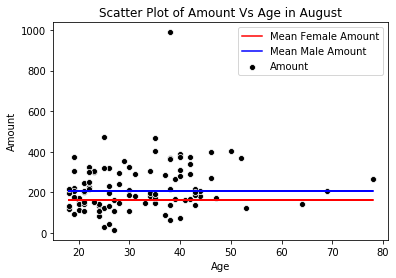

In [46]:
sns.scatterplot(x = Aug_cust_by_id['age'], y=Aug_cust_by_id['amount'], color='black', label='Amount')
plt.plot(Aug_cust_by_id['age'], np.linspace(mean_female_aug_amount, mean_female_aug_amount, length), color = 'red', label='Mean Female Amount')
plt.plot(Aug_cust_by_id['age'], np.linspace(mean_male_aug_amount, mean_male_aug_amount, length), color = 'blue', label='Mean Male Amount')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount Vs Age in August')
plt.legend()

### Month of September Average Transaction Amount and Balance Generated by Customers' age and gender

In [47]:
Sept_cust_by_id = df_ANZ[df_ANZ['months'] == 'September'].groupby('customer_id').mean()
Sept_cust_by_id

,card_present_flag,balance,age,amount
customer_id,,,,
CUS-1005756958,0.500000,3706.160714,53,333.087143
CUS-1117979751,0.888889,9334.488800,21,530.304400
CUS-1140341822,0.882353,5505.279091,28,277.897727
CUS-1147642491,0.800000,7857.650256,34,228.825128
CUS-1196156254,0.732394,22436.096633,34,113.517449
...,...,...,...,...
CUS-72755508,0.888889,4753.496923,35,242.844615
CUS-809013380,0.709677,4074.157857,21,140.050714
CUS-860700529,0.762500,3416.491798,30,68.092247


In [48]:
Sept_cust_by_gender = df_ANZ[df_ANZ['months'] == 'September'].groupby('gender').mean()
Sept_cust_by_gender

,card_present_flag,balance,age,amount
gender,,,,
F,0.793578,13010.549875,30.442998,163.193368
M,0.805104,16309.192256,30.616635,199.357433


In [49]:
mean_female_sept_balance = Sept_cust_by_gender['balance'].iloc[0]
mean_female_sept_balance

13010.549875065064

In [50]:
mean_male_sept_balance = Sept_cust_by_gender['balance'].iloc[1]
mean_male_sept_balance

16309.192256214097

In [51]:
length = len(Sept_cust_by_id['age'])
length

100

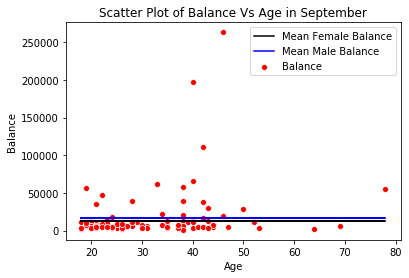

In [52]:
sns.scatterplot(x = Sept_cust_by_id['age'], y=Sept_cust_by_id['balance'], color='red', label='Balance')
plt.plot(Sept_cust_by_id['age'], np.linspace(mean_female_sept_balance, mean_female_sept_balance, length), color = 'black', label='Mean Female Balance')
plt.plot(Sept_cust_by_id['age'], np.linspace(mean_male_sept_balance, mean_male_sept_balance, length), color = 'blue', label='Mean Male Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot of Balance Vs Age in September')
plt.legend()

In [53]:
mean_female_sept_amount = Sept_cust_by_gender['amount'].iloc[0]
mean_female_sept_amount

163.19336803748033

In [54]:
mean_male_sept_amount = Sept_cust_by_gender['amount'].iloc[1]
mean_male_sept_amount

199.3574330783938

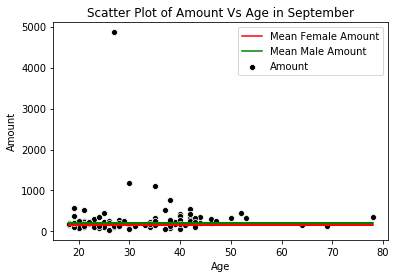

In [55]:
sns.scatterplot(x = Sept_cust_by_id['age'], y=Sept_cust_by_id['amount'], color='black', label='Amount')
plt.plot(Sept_cust_by_id['age'], np.linspace(mean_female_sept_amount, mean_female_sept_amount, length), color = 'red', label='Mean Female Amount')
plt.plot(Sept_cust_by_id['age'], np.linspace(mean_male_sept_amount, mean_male_sept_amount, length), color = 'green', label='Mean Male Amount')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount Vs Age in September')
plt.legend()

### Month of October Average Transaction Amount and Balance generated by Customers' age and gender

In [56]:
Oct_cust_by_id = df_ANZ[df_ANZ['months'] == 'October'].groupby('customer_id').mean()
Oct_cust_by_id

,card_present_flag,balance,age,amount
customer_id,,,,
CUS-1005756958,NaN,7675.756667,53,607.372222
CUS-1117979751,0.866667,14354.425625,21,375.733125
CUS-1140341822,0.815789,6992.895116,28,150.525349
CUS-1147642491,0.705882,13002.601600,34,224.022200
CUS-1196156254,0.842105,27575.176769,34,157.388923
...,...,...,...,...
CUS-72755508,0.809524,6220.971923,35,180.152692
CUS-809013380,1.000000,7775.428571,21,411.553571
CUS-860700529,0.841463,4671.130330,30,70.914286


In [57]:
Oct_cust_by_gender = df_ANZ[df_ANZ['months'] == 'October'].groupby('gender').mean()
Oct_cust_by_gender

,card_present_flag,balance,age,amount
gender,,,,
F,0.798589,15644.693277,30.510320,179.272766
M,0.808429,20981.752890,30.920893,211.897557


In [58]:
mean_female_oct_balance = Oct_cust_by_gender['balance'].iloc[0]
mean_female_oct_balance

15644.693276573738

In [59]:
mean_male_oct_balance = Oct_cust_by_gender['balance'].iloc[1]
mean_male_oct_balance

20981.752889716106

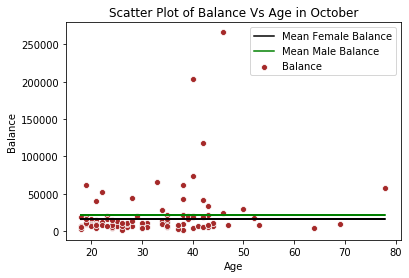

In [60]:
sns.scatterplot(x = Oct_cust_by_id['age'], y=Oct_cust_by_id['balance'], color='brown', label='Balance')
plt.plot(Oct_cust_by_id['age'], np.linspace(mean_female_oct_balance, mean_female_oct_balance, length), color = 'black', label='Mean Female Balance')
plt.plot(Oct_cust_by_id['age'], np.linspace(mean_male_oct_balance, mean_male_oct_balance, length), color = 'green', label='Mean Male Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot of Balance Vs Age in October')
plt.legend()

In [61]:
mean_female_oct_amount = Oct_cust_by_gender['amount'].iloc[0]
mean_female_oct_amount

179.27276573787393

In [62]:
mean_male_oct_amount = Oct_cust_by_gender['amount'].iloc[1]
mean_male_oct_amount

211.8975570032573

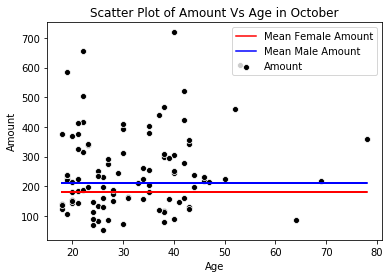

In [63]:
sns.scatterplot(x = Oct_cust_by_id['age'], y=Oct_cust_by_id['amount'], color='black', label='Amount')
plt.plot(Oct_cust_by_id['age'], np.linspace(mean_female_oct_amount, mean_female_oct_amount, length), color = 'red', label='Mean Female Amount')
plt.plot(Oct_cust_by_id['age'], np.linspace(mean_male_oct_amount, mean_male_oct_amount, length), color = 'blue', label='Mean Male Amount')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Scatter Plot of Amount Vs Age in October')
plt.legend()

In [64]:
#correlaton analysis of the dataset
np.round(df_ANZ.corr(), 3)

,card_present_flag,balance,age,amount
card_present_flag,1.000,0.006,-0.008,-0.002
balance,0.006,1.000,0.199,0.059
age,-0.008,0.199,1.000,0.030
amount,-0.002,0.059,0.030,1.000


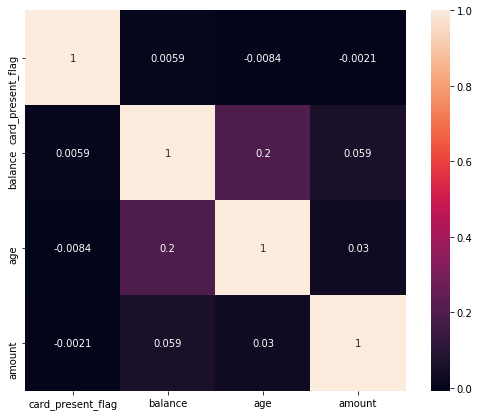

In [65]:
f, ax  = plt.subplots(figsize = (9,7))
sns.heatmap(df_ANZ.corr(), vmax = 1, square=True, annot = True)
#sns.heatmap(np.round(df_ANZ.corr(), 3), annot = True, vmax=1, square = True)

In [66]:
df_ANZ.head()

,customer_id,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement,months
0,CUS-2487424745,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,debit,August
1,CUS-2487424745,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,debit,August
2,CUS-2142601169,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,debit,August
3,CUS-1614226872,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,debit,August
4,CUS-2487424745,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,debit,August


In [67]:
df_ANZ['age'].max()

78

In [68]:
df_ANZ['age'].min()

18

In [69]:
#dfining age group
def transform(age):
    if age >= 18 and age <=29:
        return '18-29'
    if age >= 30 and age <= 39:
        return '30-39'
    if age >= 40 and age <= 49:
        return '40-49'
    if age >= 50 and age <= 59:
        return '50-59'
    if age >= 60 and age <= 69:
        return '60-69'
    if age > 69:
        return 'above 70'

In [70]:
#creating new column called age group
df_ANZ['age_group'] = df_ANZ['age'].apply(transform)
df_ANZ[5790:6020]

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_id,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement,months,age_group
5790,CUS-2650223890,posted,NaN,3973.61,2018-09-14,F,35,NaN,NaN,45.00,debit,September,30-39
5791,CUS-880898248,posted,NaN,9137.53,2018-09-14,M,26,NaN,NaN,149.00,debit,September,18-29
5792,CUS-1478398256,authorized,1.0,13197.84,2018-09-14,M,38,Sunbury,VIC,18.04,debit,September,30-39
5793,CUS-4023861240,authorized,1.0,10099.13,2018-09-14,M,28,Fountain Gate,VIC,48.03,debit,September,18-29
5794,CUS-1790886359,authorized,1.0,12219.74,2018-09-14,M,39,Tarneit,VIC,41.25,debit,September,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6015,CUS-1617121891,authorized,0.0,7080.32,2018-09-16,M,22,North Sydney,NSW,23.09,debit,September,18-29
6016,CUS-3336454548,posted,NaN,9971.90,2018-09-16,M,18,NaN,NaN,40.00,debit,September,18-29
6017,CUS-860700529,posted,NaN,3532.93,2018-09-16,M,30,NaN,NaN,165.00,debit,September,30-39
6018,CUS-2977593493,authorized,0.0,28386.24,2018-09-16,F,50,Wantirna South,VIC,57.87,debit,September,50-59


Text(0.5, 1.0, 'Plot of Balance Vs Age Group')

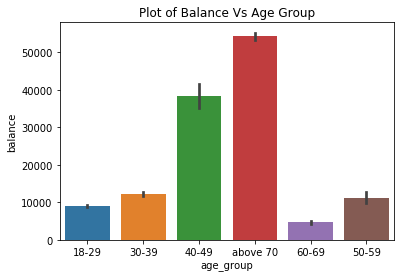

In [71]:
#plot of age group vs balance
sns.barplot(x='age_group', y='balance', data = df_ANZ)
plt.title('Plot of Balance Vs Age Group')

Text(0.5, 1.0, 'Plot of Amount Vs Age group')

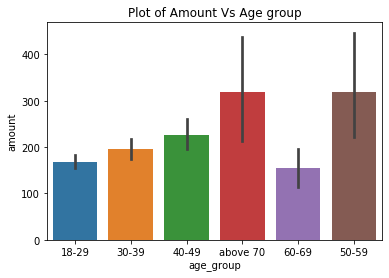

In [72]:
#plot of age group vs amount
sns.barplot(x='age_group', y='amount', data=df_ANZ)
plt.title('Plot of Amount Vs Age group')

Text(0.5, 1.0, 'Count of Merchant State')

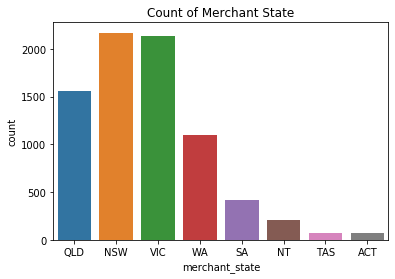

In [91]:
#count of merchant state
sns.countplot(df_ANZ['merchant_state'])
plt.title('Count of Merchant State')

Text(0.5, 1.0, 'Count of gender')

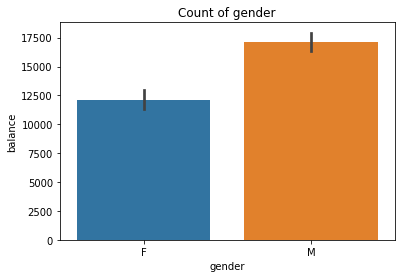

In [89]:
#plot of balance vs gender
sns.barplot(x='gender', y='balance', data=df_ANZ)
plt.title('Count of gender')

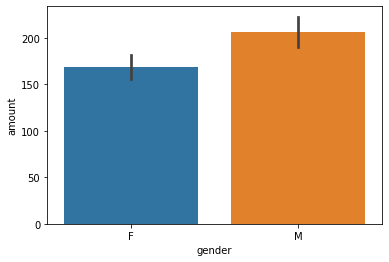

In [75]:
#plot of amount vs gender
sns.barplot(x='gender', y='amount', data=df_ANZ)

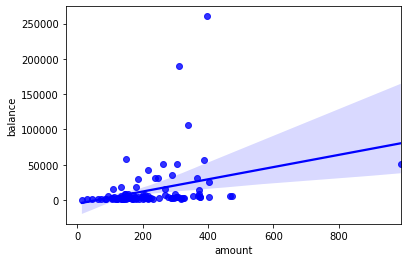

In [76]:
sns.regplot(x = 'amount', y = 'balance', data = Aug_cust_by_id, color = 'blue')

In [77]:
df_ANZ['amount'].sum()

2263284.2

In [78]:
df_ANZ['amount'].mean()

187.93358797641767

In [79]:
overall_10_best_customers = df_ANZ.groupby(['customer_id','merchant_state','gender','age_group'])['amount'].sum().sort_values(ascending = False)
overall_10_best_customers.head(10)

customer_id     merchant_state  gender  age_group
CUS-2142601169  NSW             M       30-39        8822.13
CUS-2487424745  QLD             F       18-29        7281.97
CUS-1271030853  QLD             F       30-39        7081.09
CUS-2695611575  QLD             M       30-39        6552.81
CUS-4142663097  NT              F       30-39        5915.64
CUS-1614226872  QLD             F       40-49        5582.84
CUS-3378712515  VIC             F       18-29        5082.86
CUS-3026014945  WA              F       18-29        4927.56
CUS-51506836    QLD             M       18-29        4545.19
CUS-3129499595  NSW             M       30-39        4470.26
Name: amount, dtype: float64

In [80]:
August_10_best_customers = df_ANZ[df_ANZ['months'] == 'August'].groupby(['customer_id','merchant_state','gender','age_group'])['amount'].sum().sort_values(ascending = False)
August_10_best_customers.head(10)

customer_id     merchant_state  gender  age_group
CUS-3151318058  VIC             M       40-49        2177.26
CUS-2370108457  VIC             M       40-49        2135.89
CUS-1614226872  QLD             F       40-49        2040.06
CUS-1462656821  NSW             M       18-29        2035.75
CUS-1609060617  WA              M       18-29        1970.37
CUS-4123612273  VIC             F       40-49        1678.66
CUS-3026014945  WA              F       18-29        1632.99
CUS-2487424745  QLD             F       18-29        1628.39
CUS-2142601169  NSW             M       30-39        1606.02
CUS-3378712515  VIC             F       18-29        1597.93
Name: amount, dtype: float64

In [81]:
September_10_best_customers = df_ANZ[df_ANZ['months'] == 'September'].groupby(['customer_id','merchant_state','gender','age_group'])['amount'].sum().sort_values(ascending = False)
September_10_best_customers.head(10)

customer_id     merchant_state  gender  age_group
CUS-2142601169  NSW             M       30-39        4525.09
CUS-2738291516  NSW             M       30-39        4233.00
CUS-4142663097  NT              F       30-39        3784.81
CUS-2206365095  VIC             F       30-39        3351.10
CUS-1117979751  NSW             M       18-29        2908.74
CUS-3702001629  QLD             F       18-29        2455.60
CUS-2376382098  NSW             F       30-39        2209.15
CUS-3129499595  NSW             M       30-39        2087.63
CUS-1614226872  QLD             F       40-49        2058.22
CUS-2487424745  QLD             F       18-29        1852.98
Name: amount, dtype: float64

In [82]:
October_10_best_customers = df_ANZ[df_ANZ['months'] == 'October'].groupby(['customer_id', 'merchant_state','gender','age_group'])['amount'].sum().sort_values(ascending = False)
October_10_best_customers.head(10)

customer_id     merchant_state  gender  age_group
CUS-1271030853  QLD             F       30-39        7081.09
CUS-2695611575  QLD             M       30-39        4924.39
CUS-2487424745  QLD             F       18-29        3800.60
CUS-325142416   VIC             F       18-29        3687.61
CUS-2142601169  NSW             M       30-39        2691.02
CUS-51506836    QLD             M       18-29        2460.55
CUS-3378712515  VIC             F       18-29        2458.53
CUS-1140341822  VIC             M       18-29        2146.71
CUS-4123612273  VIC             F       40-49        1926.76
CUS-3249305314  NSW             M       30-39        1847.20
Name: amount, dtype: float64

Text(0.5, 1.0, 'count of age group')

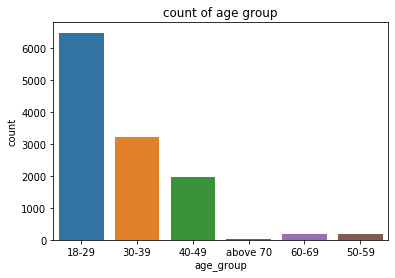

In [90]:
sns.countplot(df_ANZ['age_group'])
plt.title('count of age group')

In [84]:
#sum of all transaction made
df_ANZ['amount'].sum()

2263284.2

In [85]:
#sum of august transactions
Aug= df_ANZ[df_ANZ['months'] == 'August']
Aug_amount = Aug['amount'].sum()
Aug_amount

729935.52

In [86]:
#sum of september transactions
Sept = df_ANZ[df_ANZ['months'] == 'September']
Sept_amount = Sept['amount'].sum()
Sept.amount.sum()

730550.2100000001

In [87]:
#sum of October transactions
Oct = df_ANZ[df_ANZ['months'] == 'October']
Oct_amount = Oct['amount'].sum()
Oct_amount

802798.4700000001